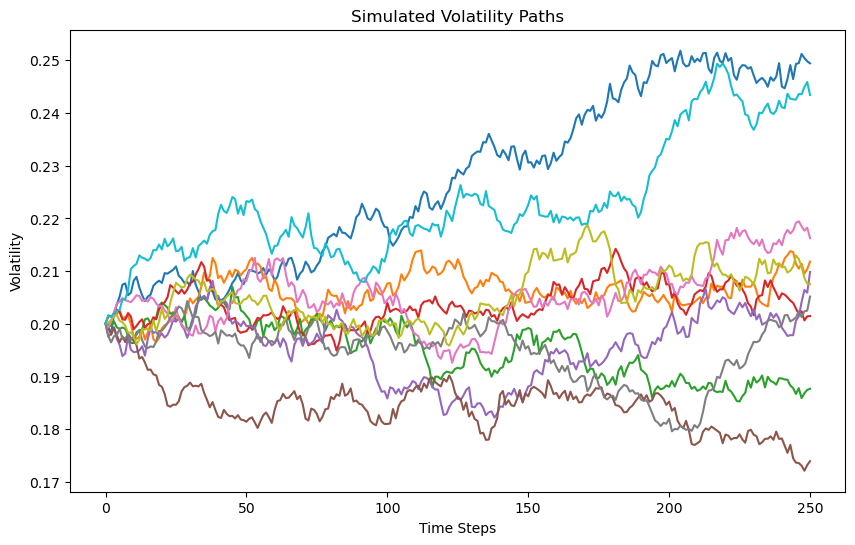

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
sigma_0 = 0.20  # Initial volatility
r = 0.01        # Risk-free rate
T = 1           # Time to maturity
sigma_vol = 0.10  # Volatility of volatility
n_paths = 1000   # Number of paths
n_steps = 250    # Number of time steps
strike_prices = np.array([0.01, 0.015, 0.02])  # Example strike prices
dt = T / n_steps  # Time increment

# Function to simulate volatility paths using GBM
def simulate_volatility_paths(sigma_0, r, sigma_vol, n_paths, n_steps, dt):
    # Initialize the array to store the volatility paths
    vol_paths = np.zeros((n_paths, n_steps + 1))
    vol_paths[:, 0] = sigma_0
    
    # Generate paths
    for t in range(1, n_steps + 1):
        z = np.random.normal(size=n_paths)
        vol_paths[:, t] = vol_paths[:, t-1] * np.exp((r - 0.5 * sigma_vol**2) * dt + sigma_vol * np.sqrt(dt) * z)
    
    return vol_paths

# Simulate volatility paths
vol_paths = simulate_volatility_paths(sigma_0, r, sigma_vol, n_paths, n_steps, dt)

# Plot some paths
plt.figure(figsize=(10, 6))
for i in range(10):  # Plot 10 paths
    plt.plot(vol_paths[i])
plt.title('Simulated Volatility Paths')
plt.xlabel('Time Steps')
plt.ylabel('Volatility')
plt.show()

# Stub for Black's formula (simplified version for educational purposes)
def blacks_formula(strike, fwd_rate, sigma, T):
    d1 = (np.log(fwd_rate / strike) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    price = (fwd_rate * norm.cdf(d1) - strike * norm.cdf(d2)) * np.exp(-r * T)
    return price

# Calculate swaption prices using Black's formula
fwd_rate = 0.02  # Forward swap rate
swaption_prices = np.zeros((n_paths, len(strike_prices)))

for i, strike in enumerate(strike_prices):
    for j in range(n_paths):
        final_vol = vol_paths[j, -1]
        swaption_prices[j, i] = blacks_formula(strike, fwd_rate, final_vol, T)

# Assuming we have a function to extract implied volatility from swaption prices
# Placeholder for now as we would need an iterative method like Newton-Raphson to find implied vols

# This setup generates volatility paths and swaption prices. To complete, we'd need an implied volatility calculation.


In [3]:
swaption_prices

array([[0.00990333, 0.00521278, 0.00196537],
       [0.00990092, 0.00509562, 0.00167012],
       [0.00990057, 0.00503736, 0.00148007],
       ...,
       [0.00990066, 0.00506001, 0.00155979],
       [0.00990108, 0.00511083, 0.00171326],
       [0.00990052, 0.00501132, 0.00137347]])